<a href="https://colab.research.google.com/github/guilhermebsousa/inferencia-estatistica/blob/main/Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testes de hipóteses
## Grupo: Thiago Rodrigues, Guilherme Barboza, Gisele de Freitas
O objetivo é implementar testes de hipoteses com Python, na mesma medida que aprendemos os assuntos. Abaixo está uma lista dos testes de hipóteses implementados:
- Kolmogorov Smirnov
- Shapiro -Wilk
- O teste x^2 de Bortlett
- Teste de Média Populacional (Zcalc)
- Teste T-student

Utilizamos materiais  e aulas produzidas e ministradas pelo professor Roberto Quirino do Nascimento para aprender e desenvolver os códigos abaixo. Algo importante sobre o tema e os seguintes testes é que uma **hipótese estatística**  é uma suposição sobre determinado parâmetro da população, como média, desvio-padrão, coeficiente de correlação, etc. Já um **teste de hipótese** é um procedimento para decisão sobre a veracidade ou falsidade de determinada hipótese. Para que uma hipótese estatística seja validada ou rejeitada com certeza, seria necessário examinarmos toda a população, o que na prática é inviável. Como alternativa, extraímos uma amostra aleatória da população de interesse. Como a decisão é tomada com base na amostra, podem ocorrer erros (rejeitar uma hipótese
quando ela for verdadeira ou não rejeitar uma hipótese quando ela for falsa), como será visto mais adiante. Ademais, o procedimento para a construção dos testes de hipóteses envolve as seguintes etapas:

- Passo 1: Escolher o teste estatístico adequado, dado o intuito do pesquisador.
- Passo 2: Apresentar a hipótese nula H0 e a hipótese alternativa H1 do teste.
- Passo 3: Fixar o nível de significância α.
- Passo 4: Calcular o valor observado da estatística do teste com base na amostra extraída da população.
- Passo 5: Determinar a região crítica do teste em função do valor de α fixado no passo 3.
- Passo 6: Decidir - se o valor da estatística pertencer à região crítica, rejeitar H0; caso contrário, não rejeitar H0.


## Kolmogorov Smirnov
O teste de Kolmogorov-Smirnov (K-S) é um teste de aderência, isto é, compara a distribuição de frequências acumuladas de um conjunto de valores
amostrais (valores observados) com uma distribuição teórica. O objetivo é testar se os valores amostrais são oriundos de uma população com
suposta distribuição teórica ou esperada, neste caso a distribuição normal. A estatística do teste é o ponto de maior diferença (em valor absoluto)
entre as duas distribuições.
Para utilização do teste de K-S, a média e o desvio-padrão da população devem ser conhecidos. Para pequenas amostras, o teste perde potência, de
modo que deve ser utilizado em amostras grandes (n≥ 30). Obs: para esse tipo de amostra pequena, anteriormente utilizamos uma função e uma tabela prefinida para esses "Valores críticos"

Para utilização do teste de K-S, a média e o desvio-padrão da população devem ser conhecidos. Para pequenas amostras, o teste perde potência, de
modo que deve ser utilizado em amostras grandes (n≥ 30).
O teste de K-S assume as seguintes hipóteses:

H0.: a amostra provém de uma população com distribuição N (µ, σ)

H1: a amostra não provém de uma população com distribuição N (µ, σ)
Seja Fesp(X) uma função de distribuição esperada (normal) de frequências relativas acumuladas da variável X, em que Fesp(X) ~ N (µ, σ), e Fobs,(X)
a distribuição de frequências relativas acumuladas observada da variável X.

O objetivo é testar se
H0.: Fobs(X) = Fesp(X)
contra a alternativa de que
H1: Fobs(X) ≠Fesp(X).

A estatística do teste é:
𝐷𝑐𝑎𝑙 = 𝑚𝑎𝑥{|𝐹𝑒𝑠𝑝(𝑋𝑖
) −𝐹𝑜𝑏𝑠(𝑋𝑖
)|,|𝐹𝑒𝑠𝑝(𝑋𝑖
) −𝐹𝑜𝑏𝑠(𝑋𝑖−1
)|}, 𝑖 = 1,2 … , 𝑛.
em que:
𝐹𝑒𝑠𝑝(𝑋𝑖
) : frequência relativa acumulada esperada na categoria i;
𝐹𝑜𝑏𝑠(𝑋𝑖
) : frequência relativa acumulada observada na categoria i;
𝐹𝑜𝑏𝑠(𝑋𝑖−1
) : frequência relativa acumulada observada na categoria i - 1.

### Bibliotecas usadas:

In [ ]:
import scipy.stats as stats
import numpy as np
from scipy.stats import bartlett
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
import pandas as pd

### Função ```amostra_aleatoria``` para gerar amostras aleatórias:

In [ ]:
def amostra_aleatoria(limite_inferior, limite_superior, tamanho_amostra, probabilidades=None):
    if probabilidades is None:
        return [random.randint(limite_inferior, limite_superior) for _ in range(tamanho_amostra)]
    else:
        amostra = []
        probabilidades_normalizadas = [p / sum(probabilidades) for p in probabilidades]

        for _ in range(tamanho_amostra):
            valor = random.choices(range(limite_inferior, limite_superior + 1), weights=probabilidades_normalizadas)[0]
            amostra.append(valor)

        return amostra

# Exemplo de uso
limite_inferior = 1
limite_superior = 11
tamanho_amostra = 200
probabilidades = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
amostra = amostra_aleatoria(limite_inferior, limite_superior, tamanho_amostra, probabilidades)
amostra = amostra_aleatoria(1,11,100)

### Função ```calcular_medidas``` para mostrar medidas

---

da amostra:

In [ ]:
def calcular_medidas(amostra):
    media = np.mean(amostra)
    desvio_padrao = np.std(amostra)
    erro_padrao = desvio_padrao / np.sqrt(len(amostra))
    count = len(amostra)
    variancia = np.var(amostra)
    maximo = np.max(amostra)
    minimo = np.min(amostra)

    print("Estatísticas da Amostra:")
    print(f"Média: {media}")
    print(f"Desvio Padrão: {desvio_padrao}")
    print(f"Erro Padrão: {erro_padrao}")
    print(f"Contagem: {count}")
    print(f"Variância: {variancia}")
    print(f"Máximo: {maximo}")
    print(f"Mínimo: {minimo}")

#Exemplo uso:
calcular_medidas(amostra)

Estatísticas da Amostra:
Média: 5.54
Desvio Padrão: 3.1029663227305577
Erro Padrão: 0.31029663227305576
Contagem: 100
Variância: 9.6284
Máximo: 11
Mínimo: 1


### Função ```calcular_frequencias ``` para obter uma tabela com frequências acumalada, absoluta, relativa, acumulada observada.

In [ ]:
def calcular_frequencias(amostra):
    # Contagem dos valores únicos na amostra
    contagem_valores = pd.Series(amostra).value_counts().sort_index()

    # Frequência acumulada
    frequencia_acumulada = contagem_valores.cumsum()

    # Frequência absoluta
    frequencia_absoluta = contagem_valores.values

    # Frequência relativa
    tamanho_amostra = len(amostra)
    frequencia_relativa = frequencia_absoluta / tamanho_amostra

    # Frequência relativa acumulada
    frequencia_relativa_acumulada = frequencia_relativa.cumsum()

    # Criar DataFrame com os valores calculados
    df = pd.DataFrame({
        'X_i': contagem_valores.index,
        'Frequência Absoluta': frequencia_absoluta,
        'Frequência Acumulada': frequencia_acumulada.values,
        'Frequência Relativa': frequencia_relativa,
        'Frequência Observada': frequencia_relativa_acumulada
    })

    return df
df = calcular_frequencias(amostra)
df

,X_i,Frequência Absoluta,Frequência Acumulada,Frequência Relativa,Frequência Observada
0,1,9,9,0.09,0.09
1,2,13,22,0.13,0.22
2,3,9,31,0.09,0.31
3,4,13,44,0.13,0.44
4,5,11,55,0.11,0.55
5,6,4,59,0.04,0.59
6,7,9,68,0.09,0.68
7,8,12,80,0.12,0.80
8,9,6,86,0.06,0.86
9,10,6,92,0.06,0.92


### Calculos necessários para obter  Dcal:
Primeiramente, calculamos o Zi, para isso é necessário calcular o valor da expressão abaixo e observar  o resultado em uma tabela, nesse caso, há um biblioteca: $$
\frac{X_i - μ}{σ}$$
A partir do valor de Z, nós podemos obter um valor para frequência esperada. Por fim, nós realizamos os sequintes calculos e adicionamos na tabela.

In [ ]:
def calculos_Dcal(df, amostra):
  df['Zi'] = (df['X_i'] - np.mean(amostra)) / np.std(amostra)
  df['Frequência Esperada'] = norm.cdf(df['Zi'])
  df['|F_esp(X_i)-F_obs(X_i)|'] = abs(df['Frequência Esperada']- df['Frequência Observada'])
  df['|F_esp(X_i)-F_obs(X_{i-1})|'] = abs(df['Frequência Esperada'] - df['Frequência Observada'].shift(fill_value=0))
  return df

df = calculos_Dcal(df,amostra)
df

,X_i,Frequência Absoluta,Frequência Acumulada,Frequência Relativa,Frequência Observada,Zi,Frequência Esperada,|F_esp(X_i)-F_obs(X_i)|,|F_esp(X_i)-F_obs(X_{i-1})|
0,1,9,9,0.09,0.09,-1.463116,0.071718,0.018282,0.071718
1,2,13,22,0.13,0.22,-1.140844,0.126967,0.093033,0.036967
2,3,9,31,0.09,0.31,-0.818572,0.206515,0.103485,0.013485
3,4,13,44,0.13,0.44,-0.496299,0.309842,0.130158,0.000158
4,5,11,55,0.11,0.55,-0.174027,0.430922,0.119078,0.009078
5,6,4,59,0.04,0.59,0.148245,0.558925,0.031075,0.008925
6,7,9,68,0.09,0.68,0.470518,0.681007,0.001007,0.091007
7,8,12,80,0.12,0.80,0.792790,0.786050,0.013950,0.106050
8,9,6,86,0.06,0.86,1.115062,0.867588,0.007588,0.067588
9,10,6,92,0.06,0.92,1.437334,0.924688,0.004688,0.064688


### Função ```result_DCal``` para obter o valor do Dcal:
O cálculo feito está abaixo e será feito utilizando a tabela obtida nos passos anteriores.
$$𝐷𝑐𝑎𝑙 = 𝑚𝑎𝑥\left\lbrace|𝐹𝑒𝑠𝑝(𝑋_i) - 𝐹𝑜𝑏𝑠(𝑋_i)|, |𝐹𝑒𝑠𝑝(𝑋_i) - 𝐹𝑜𝑏𝑠(𝑋_{i-1})|\right\rbrace
$$

In [ ]:
def result_Dcal(df):
  max_Fesp_Fobs = (df['|F_esp(X_i)-F_obs(X_i)|']).max()
  max_Fesp_Fobs1 =(df['|F_esp(X_i)-F_obs(X_{i-1})|']).max()
  listaMax = [max_Fesp_Fobs,max_Fesp_Fobs1]
  Dcalc = np.max(listaMax)
  return Dcalc
Dcalc = result_Dcal(df)
print(f"Dcal = {Dcalc}")

Dcal = 0.1301583683744792


### Calculando o valor crítico do teste de Kolmogorov Smirnov:
A função ```kolmogorov_smirnov_critico(n)``` calcula o valor crítico do teste de Kolmogorov-Smirnov dependendo do tamanho da amostra n. Para amostras com tamanho menor ou igual a 40, os valores críticos são obtidos de uma tabela predefinida. Para amostras com tamanho maior que 40, o valor crítico é calculado de acordo com uma fórmula específica. Tal função retorna o valor crítico do teste de Kolmogorov-Smirnov. Nesse caso o nivel de significância observado α é de 0,05.

In [ ]:
# Checking the critical value of the Kolmogorov-Smirnov test
def kolmogorov_smirnov_critico(n):
    # table of critical values for the kolmogorov-smirnov test - 95% confidence
    # Source: http://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/
    # alpha = 0.05 (95% confidential level)

    if n <= 40:
        # values between 1 and 40
        kolmogorov_critico = [0.97500, 0.84189, 0.70760, 0.62394, 0.56328, 0.51926, 0.48342, 0.45427, 0.43001, 0.40925,
                      0.39122, 0.37543, 0.36143, 0.34890, 0.33760, 0.32733, 0.31796, 0.30936, 0.30143, 0.29408,
                      0.28724, 0.28087, 0.27490, 0.26931, 0.26404, 0.25907, 0.25438, 0.24993, 0.24571, 0.24170,
                      0.23788, 0.23424, 0.23076, 0.22743, 0.22425, 0.22119, 0.21826, 0.21544, 0.21273, 0.21012]
        ks_critico = kolmogorov_critico[n - 1]
    elif n > 40:
        # values > 40:
        kolmogorov_critico = 1.36/(np.sqrt(n))
        ks_critico = kolmogorov_critico
    else:
        pass

    return ks_critico

Dc = kolmogorov_smirnov_critico(len(amostra))
print(f"Dc = {Dc}")

Dc = 0.136


### Resultados:

Com os valores de Dcalc e Dc basta compararmos. Se Dcal< Dc então não temos motivos para descartar a Hipotese nula com 95% de confiabilidade. Caso Dcal >=  Dc então podemos afirmar que com 95% de confiabilidade não é uma distribuição normal(assume-se a Hipotese 1).

In [ ]:
print(f"Com 95% de confianca, o valor critico do teste de Kolmogorov-Smirnov é de = {Dc}")
print(f"O valor calculado do teste de Kolmogorov-Smirnov é de = {Dcalc}")
# Conclusion
if Dc >= Dcalc:
    print("Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Kolmogorov-Smirnov")
else:
    print("Com 95% de confianca, temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Kolmogorov-Smirnov")

Com 95% de confianca, o valor critico do teste de Kolmogorov-Smirnov é de = 0.136
O valor calculado do teste de Kolmogorov-Smirnov é de = 0.1301583683744792
Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Kolmogorov-Smirnov


### Função ```plotar_comparacao_frequencias``` para plotar graficos com a frequência observada e esperada.

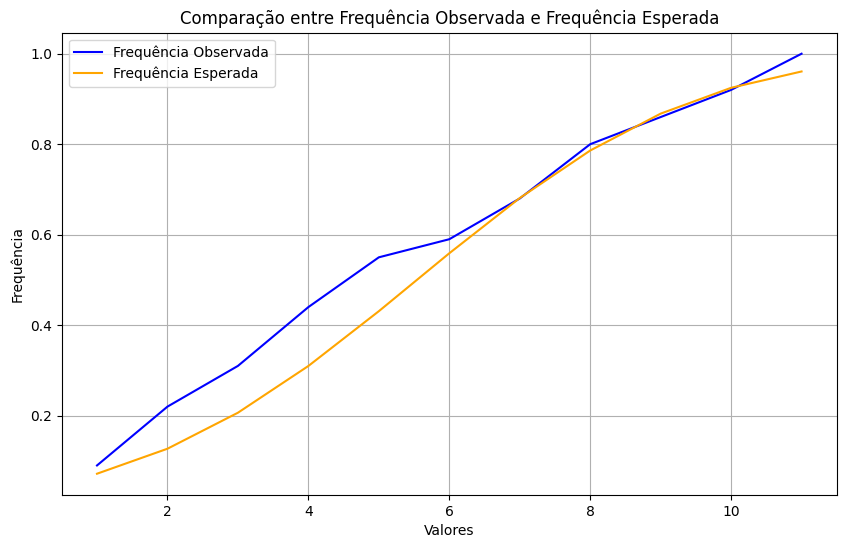

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotar_comparacao_frequencias(df):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='X_i', y='Frequência Observada', label='Frequência Observada', color='blue')
    sns.lineplot(data=df, x='X_i', y='Frequência Esperada', label='Frequência Esperada', color='orange')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.title('Comparação entre Frequência Observada e Frequência Esperada')
    plt.legend()
    plt.grid(True)
    plt.show()
plotar_comparacao_frequencias(df)

### Função ```distribuicao``` para ver como os valores estão distribuidos:

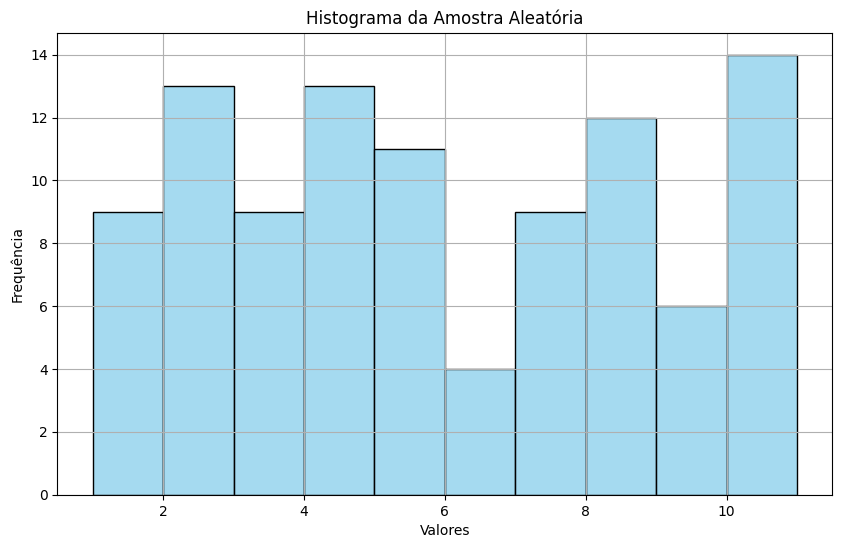

In [ ]:
def distribuicao(amostra):
    plt.figure(figsize=(10, 6))
    sns.histplot(amostra, kde=False, color='skyblue', bins=10)
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.title('Histograma da Amostra Aleatória')
    plt.grid(True)
    plt.show()
distribuicao(amostra)

## Outra abordagem utilizando Scypy

In [ ]:
# Calculating the value of the Kolmogorov-Smirnov statistic for the data
media = np.mean(amostra)
std = np.std(amostra)
tamanho_amostra = len(amostra)
ks_critico = kolmogorov_smirnov_critico(tamanho_amostra)
ks_stat, ks_p_valor = stats.kstest(amostra, cdf='norm', args=(media, std), N = tamanho_amostra)
print("A media dos dados é = " + str(media))
print("O desvio padrao dos dados é = " + str(std))
print("Com 95% de confianca, o valor critico do teste de Kolmogorov-Smirnov é de = " + str(ks_critico))
print("O valor calculado do teste de Kolmogorov-Smirnov é de = " + str(ks_stat))
# Conclusion
if ks_critico >= ks_stat:
    print("Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Kolmogorov-Smirnov")
else:
    print("Com 95% de confianca, temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Kolmogorov-Smirnov")

A media dos dados é = 5.54
O desvio padrao dos dados é = 3.1029663227305577
Com 95% de confianca, o valor critico do teste de Kolmogorov-Smirnov é de = 0.136
O valor calculado do teste de Kolmogorov-Smirnov é de = 0.1301583683744792
Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Kolmogorov-Smirnov


### Para as cinquenta amostras aleatórias:

In [ ]:
#Cinquenta amostras para serem testadas
amostras = []
for i in range(20):
  amostras.append(amostra_aleatoria(1,11,200, probabilidades))
for i in range(20):
  amostras.append(amostra_aleatoria(20, 54, 200))
for _ in range(10):
    amostra = np.random.normal(loc=10, scale=2, size=200)
    amostras.append(amostra)
print(f'Foram geradas {len(amostras)} amostras aleatórias')

Foram geradas 50 amostras aleatórias


### Aplicando as funções criadas

In [ ]:
Dc = kolmogorov_smirnov_critico(200)
dfs = []
dCals = []
resultados = []
# Calculando as frequências
for i in amostras:
  dfs.append(calcular_frequencias(i))
# Caculando a Dcals
for i in range(50):
  dCals.append(calculos_Dcal(dfs[i],amostras[i]))
for i in dCals:
  resultados.append(result_Dcal(i))

print(resultados)


[0.08185015382003025, 0.09068101893631891, 0.09662095274908578, 0.12443624524184693, 0.09538147840756983, 0.10004567022409638, 0.11699589059962501, 0.09019850941841528, 0.1057767356150639, 0.10799630244734948, 0.10543336085461597, 0.11139570663004772, 0.15072216282422157, 0.09979788253847632, 0.10344642212932231, 0.10006901128919943, 0.09369047362392702, 0.10600604546772896, 0.11528382293040007, 0.10398514186452912, 0.09435749986939507, 0.07830801019881395, 0.1053094809061858, 0.11043675697555588, 0.08292450523123185, 0.09782387610860499, 0.12309102623449664, 0.09300229694842566, 0.08800194060684108, 0.09225758552651331, 0.06782663139838818, 0.1095696513173603, 0.09719036643508583, 0.1113014578270316, 0.1294091449819882, 0.11168883242499855, 0.09550933473447532, 0.0893033070876908, 0.08301168469194176, 0.07224992809585318, 0.044185838647260584, 0.036453322485904494, 0.03581316868155471, 0.05443249795104749, 0.05184932070273013, 0.0332541357131898, 0.046743182865379124, 0.03805454121706

In [ ]:
!pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.4 MB/s eta 0:00:00


### Gerando pdf com as infos de um df


In [ ]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle

def gerar_pdf(df,nome_arquivo):
  # Definindo o nome do arquivo PDF
  pdf_filename = f"{nome_arquivo}.pdf"

  # Criando um documento PDF
  doc = SimpleDocTemplate(pdf_filename, pagesize=letter)

  # Criando uma lista para conter os elementos do PDF
  elements = []

  # Convertendo o DataFrame para uma lista de listas
  data = [df.columns.tolist()] + df.values.tolist()

  # Criando a tabela com os dados do DataFrame
  t = Table(data)

  # Estilizando a tabela
  t.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                        ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
                        ('GRID', (0, 0), (-1, -1), 1, colors.black)]))

  # Adicionando a tabela à lista de elementos do PDF
  elements.append(t)

  # Construindo o PDF
  doc.build(elements)


### Gerando relatório das 50 amostras

In [ ]:
Dc = kolmogorov_smirnov_critico(200)
df = pd.DataFrame({
    'Amostra': [i+1 for i in range(len(amostras))],
    'Resultados': resultados,
    'Dc': Dc,
    'Hipotese(95% de confiança)': ['Temos evidências para rejeitar a hipótese de normalidade dos dados' if dcalc <= Dc else 'Não temos evidências para rejeitar a hipótese de normalidade dos dados' for dcalc in resultados]
})
df.head(5)
gerar_pdf(df,'teste')

### Resultados:

In [ ]:
Dc = kolmogorov_smirnov_critico(200)
for i in range(50):
  if  resultados[i] < Dc :
    print(f"{i}) Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Kolmogorov-Smirnov")
    print(f"{resultados[i]} < {Dc}")
  else:
    print(f"{i}) Com 95% de confianca, temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Kolmogorov-Smirnov")
    print(f"{resultados[i]} >= {Dc}")

## Shapiro -Wilk

Usei esse site para obter as tabelas: https://real-statistics.com/statistics-tables/shapiro-wilk-table/

In [ ]:
amostra = [15,19,23,24,28,30,32,36,16,20,23,25,29,31,34,39,18,22,24,28,30,32,36,46]

### Tabela dos coeficientes

In [ ]:
df = pd.read_excel("Sw1.xlsx")
df = df.fillna(0)
df.head(5)

,n =,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,a1,0.7071,0.7071,0.6872,0.6646,0.6431,0.6233,0.6052,0.5888,0.5739,...,0.4291,0.4254,0.4220,0.4188,0.4156,0.4127,0.4096,0.4068,0.4040,0.4015
1,a2,0.0000,0.0000,0.1677,0.2413,0.2806,0.3031,0.3164,0.3244,0.3291,...,0.2968,0.2944,0.2921,0.2898,0.2876,0.2854,0.2834,0.2813,0.2794,0.2774
2,a3,0.0000,0.0000,0.0000,0.0000,0.0875,0.1401,0.1743,0.1976,0.2141,...,0.2499,0.2487,0.2475,0.2463,0.2451,0.2439,0.2427,0.2415,0.2403,0.2391
3,a4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0561,0.0947,0.1224,...,0.2150,0.2148,0.2145,0.2141,0.2137,0.2132,0.2127,0.2121,0.2116,0.2110
4,a5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0399,...,0.1864,0.1870,0.1874,0.1878,0.1880,0.1882,0.1883,0.1883,0.1883,0.1881


### Tabela com os valores de W

In [ ]:
Ws = pd.read_excel('Sw2.xlsx')
Ws.head(5)

,n \ p,0.01,0.02,0.05,0.1,0.5,0.9,0.95,0.98,0.99
0,3,0.753,0.756,0.767,0.789,0.959,0.998,0.999,1.000,1.000
1,4,0.687,0.707,0.748,0.792,0.935,0.987,0.992,0.996,0.997
2,5,0.686,0.715,0.762,0.806,0.927,0.979,0.986,0.991,0.993
3,6,0.713,0.743,0.788,0.826,0.927,0.974,0.981,0.986,0.989
4,7,0.730,0.760,0.803,0.838,0.928,0.972,0.979,0.985,0.988


### Gerando tabela importante para obtermos o valor de B, através da função ```processar_amostra```

In [ ]:
def processar_amostra(amostra, df):
    n = len(amostra)

    # Ordenar a amostra
    amostra_ordenada = sorted(amostra)
    meio = n // 2

    colunas = {
        'i': list(range(1, meio + 1)),  # Pegar até a metade dos valores maiores
        'n-i-1': list(range(n-1, meio-1, -1)),  # Iniciar de n-1 e ir até a metade dos valores menores
        'a_i,n': [df.loc[i, n] for i in range(meio)],  # Pegar até a metade dos valores de a
        'X_(n-i-1)': [amostra_ordenada[n-i-1] for i in range(meio)],  # Pegar até a metade dos valores maiores
        'X_i': [amostra_ordenada[i] for i in range(meio)],  # Pegar até a metade dos valores menores
        'a_i,n(X_(n-i-1)-X_i)': [df.iloc[i, n] * (amostra_ordenada[n-i-1] - amostra_ordenada[i]) for i in range(meio)]
    }
    tabela = pd.DataFrame(colunas)
    return tabela


tabela = processar_amostra(amostra,df)
tabela

,i,n-i-1,"a_i,n",X_(n-i-1),X_i,"a_i,n(X_(n-i-1)-X_i)"
0,1,29,0.4254,14.085589,6.270457,3.297986
1,2,28,0.2944,13.886218,6.302632,2.215165
2,3,27,0.2487,12.096359,6.875056,1.292273
3,4,26,0.2148,11.754090,7.470006,0.918936
4,5,25,0.1870,11.529435,8.036039,0.654662
5,6,24,0.1630,11.523461,8.235361,0.539577
6,7,23,0.1415,11.432026,8.274027,0.452541
7,8,22,0.1219,10.798561,8.380151,0.300608
8,9,21,0.1036,10.638537,8.580241,0.219414
9,10,20,0.0862,10.627136,8.599159,0.182315


### Valor de B e cálculo de Wcalc

In [ ]:
calcular_medidas(amostra)

Estatísticas da Amostra:
Média: 27.5
Desvio Padrão: 7.466592261534039
Erro Padrão: 1.5241117631809902
Contagem: 24
Variância: 55.75
Máximo: 46
Mínimo: 15


Função ```Wcalc```

In [ ]:
def Wcalc(amostra,tabela):
  B = tabela['a_i,n(X_(n-i-1)-X_i)'].sum()
  soma = 0
  for i in amostra:
    soma += (i - np.mean(amostra))**2
  return B**2 / soma
Wcalc(amostra,tabela)

0.9715248414070247

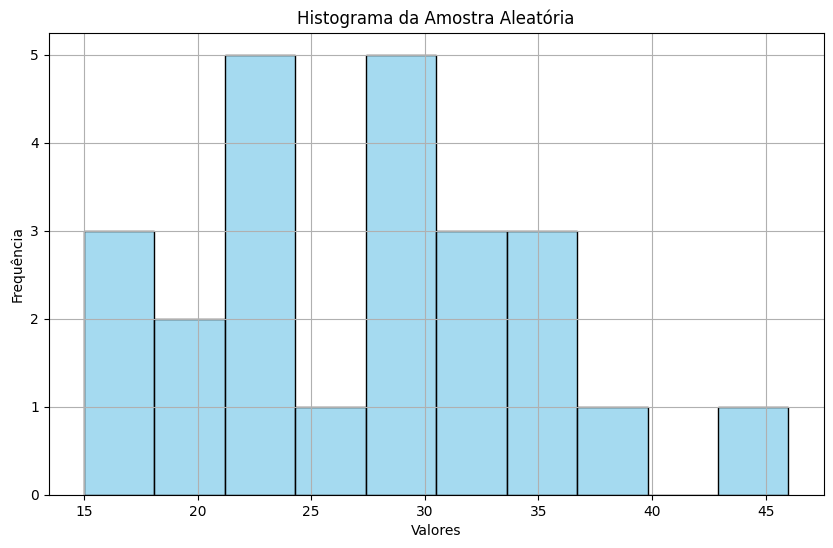

In [ ]:
distribuicao(amostra)

### Conclusão

In [ ]:
if Wcalc(amostra,tabela) >= Ws[0.05][len(amostra)]:
  print("A hipótese nula não é rejeitada, podemos concluir com 90% de confiança que a amostra obtida é de uma população com distribuição normal")
else:
  print("Podemos concluir com 90% de confiança que a amostra obtida não é de uma população com distribuição normal")

A hipótese nula não é rejeitada, podemos concluir com 90% de confiança que a amostra obtida é de uma população com distribuição normal


### Fazendo para cinquenta amostras:

In [ ]:
#Cinquenta amostras para serem testadas
amostras = []
for i in range(20):
  amostras.append(amostra_aleatoria(1,11,30, probabilidades))
for i in range(20):
  amostras.append(amostra_aleatoria(20, 54, 30))
for _ in range(10):
    amostra = np.random.normal(loc=10, scale=2, size=30)
    amostras.append(amostra)
print(f'Foram geradas {len(amostras)} amostras aleatórias')

Foram geradas 50 amostras aleatórias


### Gerando relátorio das 50 amostras

In [ ]:
import pandas as pd

wcalcs = []
ws = []

for i in range(len(amostras)):
    tabela = processar_amostra(amostras[i], df)
    wcalc = Wcalc(amostras[i], tabela)
    wcalcs.append(wcalc)
    w = Ws[0.05][len(amostras[i])]
    ws.append(w)




tabela_sw = pd.DataFrame({
    'Amostra': [i + 1 for i in range(len(amostras))],
    'Wcals': wcalcs,
    'Ws': ws,
    'Hipotese(95% de confiança)': ['Temos evidências para rejeitar a hipótese de normalidade dos dados' if wcalcs[i] < ws[i] else 'Não temos evidências para rejeitar a hipótese de normalidade dos dados' for i in range(len(amostras))]
})
gerar_pdf(tabela_sw,'Tabela_sw')

## O teste χ² de Bartlett


O teste de Bartlett é uma técnica estatística utilizada para testar a igualdade das variâncias de duas ou mais populações. Ele é uma extensão do teste F de Fisher e é especialmente útil quando as amostras têm tamanhos diferentes e a suposição de homogeneidade das variâncias não pode ser garantida. Além disso, a aplicação do teste de Bartlett pressupõe que as amostras são independentes e que as populações subjacentes são normalmente distribuídas.

**Formulação da hipótese nula (H0):** A hipótese nula do teste de Bartlett é que as variâncias das populações são iguais.

**Formulação da hipótese alternativa (H1):** A hipótese alternativa é que pelo menos duas das populações têm variâncias diferentes.

**Cálculo da estatística de teste:** A estatística de teste segue uma distribuição qui-quadrado (χ²) com
𝑘
−
1
graus de liberdade, onde
𝑘
 é o número de grupos.

**Tomada de decisão:** Se o valor-p associado à estatística de teste for menor que um nível de significância pré-determinado (geralmente 0,05), a hipótese nula é rejeitada, indicando que há evidências suficientes para concluir que as variâncias das populações não são todas iguais.

In [ ]:
np.random.seed(0)
group1 = np.random.normal(loc=0, scale=1, size=100)   #grupo1: desvio padrão = 1
group2 = np.random.normal(loc=0, scale=1.5, size=100) #grupo2:desvio padrão = 1.5
group3 = np.random.normal(loc=0, scale=2, size=100)   #grupo3: desvio padrão = 2

statistic, p_value = bartlett(group1, group2, group3) #a função Bartlett calcula a estatística do teste de Bartlett para testar a hipótese de que as variâncias das populações subjacentes são iguais


print("Estatística do teste de Bartlett:", statistic)
print("Valor-p:", p_value)

#Tomada de decisão da hipótese
alpha = 0.05  #nível de significância padrão (5%)
if p_value < alpha:
    print("Rejeitar H0: As variâncias não são iguais.")
else:
    print("Aceitar H0: Não há evidências suficientes para concluir que as variâncias são diferentes.")

Estatística do teste de Bartlett: 37.49481359606159
Valor-p: 7.21281308036949e-09
Rejeitar H0: As variâncias não são iguais.


Interpretação: se o valor-p associado à estatística do teste for menor que um determinado nível de significância, então rejeitamos a hipótese nula de igualdade de variâncias, indicando que há evidências suficientes para concluir que pelo menos duas das populações têm variâncias diferentes.

##Exemplo de aplicação real do Teste De Bartlett


Um exemplo real de aplicação do teste de Bartlett pode ser encontrado em estudos que comparam a variabilidade de medidas ou observações entre diferentes grupos ou condições. Por exemplo, um estudo para avaliar a eficácia de três tipos diferentes de tratamentos para reduzir a pressão arterial em pacientes com hipertensão, onde há três grupos (A, B e C) recebendo um tipo diferente de tratamento. O pesquisador deseja saber se existe uma diferença significativa na variabilidade da pressão arterial entre os três grupos após o tratamento

In [ ]:
#Simulação de dados de pressão arterial antes e depois do tratamento para cada grupo
np.random.seed(0)

#Grupo A: pressão arterial antes do tratamento
groupA_before = np.random.normal(loc=140, scale=10, size=100)    #loc= média de distribuição normal (milímetros de mercúrio(mmHg))
#Grupo A: pressão arterial depois do tratamento                #scale = desvio padrão da distribuição normal
groupA_after = np.random.normal(loc=130, scale=10, size=100)

#Grupo B: pressão arterial antes do tratamento
groupB_before = np.random.normal(loc=150, scale=12, size=100)
#Grupo B: pressão arterial depois do tratamento
groupB_after = np.random.normal(loc=135, scale=12, size=100)

#Grupo C: pressão arterial antes do tratamento
groupC_before = np.random.normal(loc=145, scale=8, size=100)
#Grupo C: pressão arterial depois do tratamento
groupC_after = np.random.normal(loc=125, scale=8, size=100)

#Teste de Bartlett para comparar a variabilidade entre os grupos
statistic, p_value = bartlett(groupA_before, groupA_after,
                               groupB_before, groupB_after,
                               groupC_before, groupC_after)

print("Estatística do teste de Bartlett:", statistic)
print("Valor-p:", p_value)

#Tomada de decisão
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: As variâncias não são iguais.")
else:
    print("Aceitar H0: Não há evidências suficientes para concluir que as variâncias são diferentes.")

Estatística do teste de Bartlett: 20.038394238217556
Valor-p: 0.0012291661579761966
Rejeitar H0: As variâncias não são iguais.


Valor-p menor que 0,05: Se o valor-p for menor que 0,05, então rejeitaríamos a hipótese nula. Isso significaria que há evidências suficientes para sugerir que pelo menos duas das populações têm variâncias diferentes.

Valor-p maior que 0,05: Se o valor-p for maior que 0,05, então não rejeitaríamos a hipótese nula. Isso significaria que não há evidências suficientes para concluir que as variâncias são diferentes entre os grupos.

Portanto, ao interpretar os resultados do teste de Bartlett, estaríamos interessados em saber se há uma diferença significativa na variabilidade da pressão arterial entre os grupos de pacientes. Se o valor-p for significativamente menor que 0,05, isso indicaria que a variabilidade da pressão arterial difere entre os grupos, o que pode ter implicações importantes para a escolha do tratamento mais adequado para pacientes com hipertensão.

##Gráfico Boxplot para visualizar a distribuição dos dados de pressão arterial antes e depois don tratamento

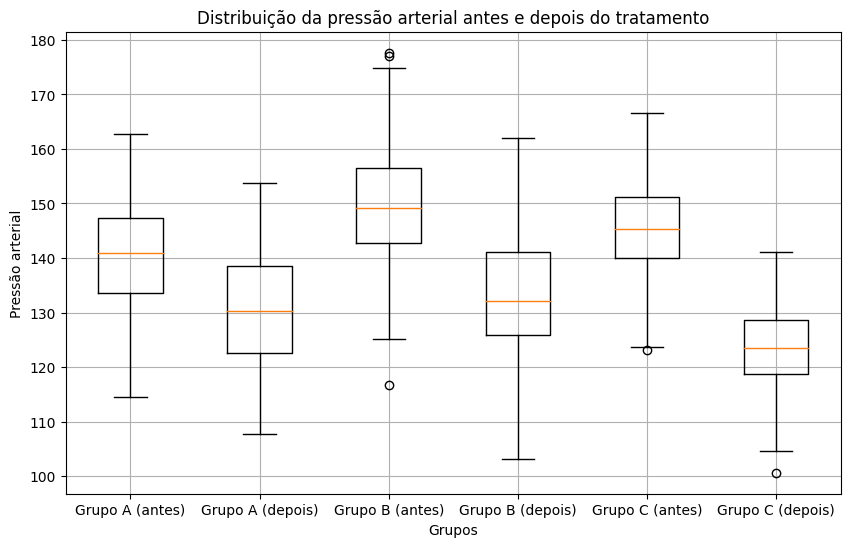

   Estatística do teste de Bartlett   Valor-p   Resultado
0                         20.038394  0.001229  Diferentes


In [ ]:
#Gráficos antes e depois do tratamento em cada grupo
plt.figure(figsize=(10, 6))
plt.boxplot([groupA_before, groupA_after, groupB_before, groupB_after, groupC_before, groupC_after],
            labels=['Grupo A (antes)', 'Grupo A (depois)', 'Grupo B (antes)', 'Grupo B (depois)', 'Grupo C (antes)', 'Grupo C (depois)'])

plt.title('Distribuição da pressão arterial antes e depois do tratamento')
plt.ylabel('Pressão arterial')
plt.xlabel('Grupos')
plt.grid(True)
plt.show()

#Teste de Bartlett para comparar a variabilidade entre os grupos
statistic, p_value = bartlett(groupA_before, groupA_after,
                               groupB_before, groupB_after,
                               groupC_before, groupC_after)

#Tabela de resumo
summary_table = pd.DataFrame({
    'Estatística do teste de Bartlett': [statistic],
    'Valor-p': [p_value],
    'Resultado': ['Diferentes' if p_value < 0.05 else 'Sem diferença']
})

print(summary_table)

##Gráfico histograma para a visualização dos dados de pressão arterial de antes e depois do tratamento no grupo A

In [ ]:

plt.figure(figsize=(10, 6))

plt.hist(groupA_before, bins=15, alpha=0.5, color='blue', label='Antes do tratamento')
plt.hist(groupA_after, bins=15, alpha=0.5, color='green', label='Depois do tratamento')

plt.title('Distribuição da pressão arterial no Grupo A antes e depois do tratamento')
plt.xlabel('Pressão arterial')
plt.ylabel('Frequência')
plt.legend()
plt.grid(False)
plt.show()

##Gráfico histograma para a visualização dos dados de pressão arterial de antes e depois do tratamento no grupo B

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(groupB_before, bins=15, alpha=0.5, color='blue', label='Antes do tratamento')
plt.hist(groupB_after, bins=15, alpha=0.5, color='green', label='Depois do tratamento')

plt.title('Distribuição da pressão arterial no Grupo B antes e depois do tratamento')
plt.xlabel('Pressão arterial')
plt.ylabel('Frequência')
plt.legend()
plt.grid(False)
plt.show()

##Gráfico histograma para a visualização dos dados de pressão arterial de antes e depois do tratamento no grupo C

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(groupC_before, bins=15, alpha=0.5, color='blue', label='Antes do tratamento')
plt.hist(groupC_after, bins=15, alpha=0.5, color='green', label='Depois do tratamento')

plt.title('Distribuição da pressão arterial no Grupo C antes e depois do tratamento')
plt.xlabel('Pressão arterial')
plt.ylabel('Frequência')
plt.legend()
plt.grid(False)
plt.show()

##Conclusão


Em geral, se a estatística de Bartlett for alta, isso sugere que as variâncias entre os grupos são diferentes. Por outro lado, se a estatística de Bartlett for baixa, isso sugere que as variâncias entre os grupos são semelhantes.
Em resumo, o resultado da estatística de Bartlett fornece uma indicação da magnitude da diferença nas variâncias entre os grupos e é usado para avaliar a homogeneidade das variâncias.
Se as variâncias são diferentes entre os grupos, técnicas estatísticas robustas, como a análise de variâncias com correção para heterogeneidade de variâncias, podem ser mais apropriadas.
Se as variâncias são semelhantes, isso fortalece a confiança nas conclusões do estudo, especialmente em relação às comparações entre os grupos.

## Teste de Média Populacional (Zcalc)

O teste de média populacional, ou teste Z, é utilizado quando queremos comparar a média de uma amostra com a média de uma população conhecida, assumindo que a distribuição da amostra é normal ou que o tamanho da amostra é grande o suficiente para que a distribuição amostral da média seja aproximadamente normal.

O teste Z calcula uma estatística Z, que representa a diferença entre a média da amostra e a média populacional, padronizada pela variabilidade da amostra e pelo tamanho da amostra. Em seguida, essa estatística Z é comparada com a distribuição normal padrão para determinar a probabilidade de observar tal diferença sob a hipótese nula de que não há diferença entre as médias.

##Exemplo de Implementação

Vamos supor que queremos comparar a média de residentes por moradia na cidade de João Pessoa, com a média do Bairro de Mangabeira.

Neste exemplo fica claro que teremos a média de João Pessoa como Universo, e a média de Mangabeira como amostra.

###Hipóteses

**H0**: Hipótese nula, considerando que as médias se aproximam significativamente.
**H1**: Alternativa, considera que as médias possuem uma diferença significativa.

##Implementação ZCalc(ou Teste Z)

###Importando Tabelas


In [ ]:
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

###Gerando os dados

In [ ]:
jp = [random.randint(1,4) for i in range(200)]
mng = [random.randint(1,6) for i in range(50)]

###Coleta de Dados

In [ ]:
#Cálculo das Médias
m_jp = np.mean(jp)
m_mng = np.mean(mng)
print(f"Média Universo(João Pessoa): {m_jp}")
print(f"Média Amostral(Mangabeira): {m_mng}")

#Cálculo do Desvio Padrão
des_jp = np.std(jp)
des_mng = np.std(mng)
print(f"Desvio Padrão Universo(João Pessoa): {des_jp:.2f}")
print(f"Desvio Padrão Amostral(Mangabeira): {des_mng:.2f}")

Média Universo(João Pessoa): 2.495
Média Amostral(Mangabeira): 3.1
Desvio Padrão Universo(João Pessoa): 1.18
Desvio Padrão Amostral(Mangabeira): 1.90


###Cálculo da Estatística Teste Z

Para calcular o teste Z, você precisa ter a média da amostra (x̄), a média populacional (μ), o desvio padrão da população (σ) e o tamanho da amostra (n). A fórmula geral para calcular o valor Z é:

\begin{equation}
Z = \frac{{\bar{x} - \mu}}{{\frac{{\sigma}}{{\sqrt{n}}}}}
\end{equation}

Onde:
   - $\bar{x}$ é a média da amostra
   - $μ$ é a média populacinal
   - $σ$ é o desvio padrão populacional
   - $n$ é o tamanho da amostra

In [ ]:
z = (m_mng - m_jp) / (des_jp / (np.sqrt(len(mng))))
print(f"Z = {z:.2f}")

Z = 3.62


###Comparação com a distribuição normal padrão

Nivel de significância considerado: 5%

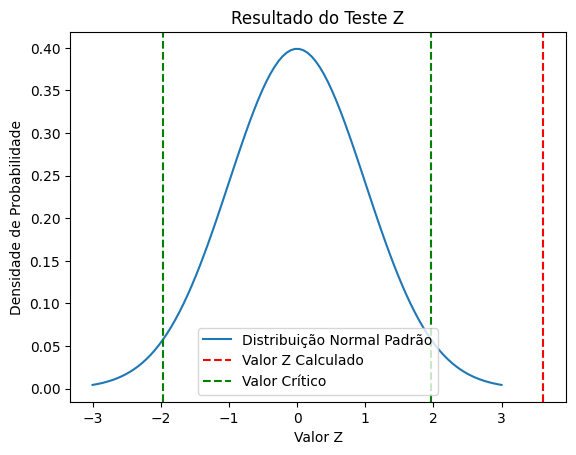

------------------------------------------------------------
Valor Z: 3.62
Valor Z Crítico: 1.960

Rejeitar H0: A média da amostra é significativamente diferente da média populacional.


In [ ]:
#Nivel de Significancia
a = 0.05

#Encontrando o Valor critico usando a distribuição normal padrão
z_critico = stats.norm.ppf(1 - a/2)
#Média e o desvio padrão da distribuição normal padrão
mu = 0
sigma = 1

# Gerar dados para plotar a distribuição normal padrão
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# Plotar a distribuição normal padrão
plt.plot(x, y, label='Distribuição Normal Padrão')

# Plotar uma linha vertical para o valor Z calculado
plt.axvline(x=z, color='r', linestyle='--', label='Valor Z Calculado')

# Plotar linhas verticais para os valores críticos
plt.axvline(x=z_critico, color='g', linestyle='--', label='Valor Crítico')
plt.axvline(x=-z_critico, color='g', linestyle='--')

# Adicionar legendas e título
plt.legend()
plt.title('Resultado do Teste Z')
plt.xlabel('Valor Z')
plt.ylabel('Densidade de Probabilidade')

# Mostrar o gráfico
plt.show()
print("------------------------------------------------------------")
print(f"Valor Z: {z:.2f}")
print(f"Valor Z Crítico: {z_critico:.3f}")

# Comparar o valor Z calculado com os valores críticos
if z > z_critico or z < -z_critico:
    print("\nRejeitar H0: A média da amostra é significativamente diferente da média populacional.")
else:
    print("Não rejeitar H0: Não há evidências suficientes para afirmar que a média da amostra é diferente da média populacional.")

## Teste T-student

O teste t de Student é uma ferramenta estatística fundamental utilizada para comparar as médias de duas amostras independentes. Ele é especialmente útil quando se deseja determinar se uma diferença observada entre duas amostras é estatisticamente significativa. Desenvolvido por William Sealy Gosset em 1908 e publicado sob o pseudônimo de "Student", esse teste é amplamente aplicável em diversas áreas, incluindo ciências sociais, medicina, negócios e engenharia.

O teste t de Student parte da hipótese nula de que não há diferença significativa entre as médias das duas amostras. Ele calcula uma estatística t que representa a diferença entre as médias das amostras padronizada pela variabilidade das amostras e pelo tamanho das amostras. Em seguida, essa estatística t é comparada com a distribuição t de Student para determinar a probabilidade de observar tal diferença sob a hipótese nula.

##Exemplo de Implementação

Vamos considerar que o CI deseja realizar uma comparação de altura dos alunos de dois cursos do primeiro período. Os cursos de Ciência de Dados e Ciência da Computação foram os escolhidos.

###Hipóteses

**H0**: Será a hipótese de que não há diferença significativa entre a média de altura dos alunos dos cursos acima citados.

**H1**: Será a hipótese de que há sim uma diferença entre a médias das alturas dos alunos.

##Geração das Amostras de Altura dos Alunos

###Importando bibliotecas

In [ ]:
import random
import numpy as np
from scipy.stats import t as t_student
import matplotlib.pyplot as plt

In [ ]:


# Criando amostras aleatória de tamanho 25 e 20 com valores minimos e
# maximos de 160 e 200, e 150 e 200, respectivamente.
cdia = [random.randint(160,200) for i in range(25)]
cdc = [random.randint(150,190) for j in range(20)]
print(f"Alturas CDIA: {cdia}")
print(f"Alturas CDC: {cdc}")

Alturas CDIA: [192, 192, 197, 193, 189, 182, 162, 199, 164, 160, 170, 194, 178, 188, 190, 169, 171, 168, 197, 174, 166, 200, 179, 162, 169]
Alturas CDC: [185, 174, 184, 162, 181, 177, 182, 174, 157, 155, 188, 163, 165, 173, 189, 173, 174, 188, 187, 159]


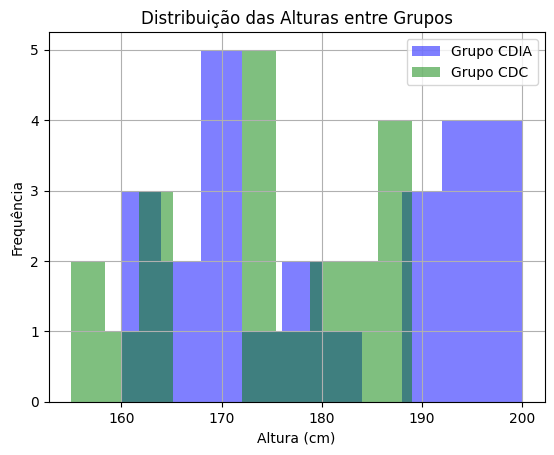

In [ ]:
# Plotagem dos histogramas das alturas
plt.hist(cdia, bins=10, alpha=0.5, color='blue', label='Grupo CDIA')
plt.hist(cdc, bins=10, alpha=0.5, color='green', label='Grupo CDC')

# Configurações do gráfico
plt.xlabel('Altura (cm)')
plt.ylabel('Frequência')
plt.title('Distribuição das Alturas entre Grupos')
plt.legend()
plt.grid(True)

# Exibição do gráfico
plt.show()


##Coleta de Dados das Amostras

In [ ]:
#Cálculo da média das amostras
m_cdia = np.mean(cdia)
m_cdc = np.mean(cdc)

#Cálculo do desvio padrão
des_cdia = np.std(cdia)
des_cdc = np.std(cdc)

print('--------CDIA---------')
print(f"Média de altura: {m_cdia}")
print(f"Desvio Padrão: {des_cdia:.2f}\n")

print('--------CDC---------')
print(f"Média de altura: {m_cdc}")
print(f"Desvio Padrão: {des_cdc:.2f}\n")


--------CDIA---------
Média de altura: 180.2
Desvio Padrão: 13.19

--------CDC---------
Média de altura: 174.5
Desvio Padrão: 10.83



##Cálculo da Estatística T

Fórmula para calcular a estatística t para duas amostras independentes:

\begin{equation}
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
\end{equation}


Onde:
- 𝑥̅₁ e 𝑥̅₂ são as médias das duas amostras.
- 𝑠₁ e 𝑠₂ são os desvios padrão das duas amostras.
- 𝑛₁ e 𝑛₂ são os tamanhos das duas amostras.

##Aplicação em Python

In [ ]:
# Fórmula estatística T
t = (m_cdia-m_cdc)/np.sqrt((((des_cdia)**2)/len(cdia)) + (((des_cdc)**2)/len(cdc)))
print(f"t = {t:.3f}")

t = 1.592


##Determinação do Grau de Liberdade

O grau de liberdade é uma medida estatística que está associada à variabilidade dos dados e é importante para calcular valores críticos de t e interpretar os resultados do teste.

Para o teste t de Student de duas amostras independentes, o cálculo do grau de liberdade é feito da seguinte maneira:

\begin{equation}
df = n_1 + n_2 - 2
\end{equation}

- Onde:
- $n_1$ é o tamanho da primeira amostra.
- $n_2$ é o tamanho da segunda amostra.



In [ ]:
gl = len(cdia) + len(cdc) - 2
print(f'Grau de Liberdade: {gl}')

Grau de Liberdade: 43


##Cálculo do Valor Crítico

Nivel de significância considerado: 5%

In [ ]:
#Cálculo de Valor Crítico realizado com biblioteca SciPy
a = 0.05

valor_critico = t_student.ppf(1 - a/2, gl)
print(f"Valor crítico de t: {valor_critico:.3f}")

Valor crítico de t: 2.017


##Plotagem dos Resultados

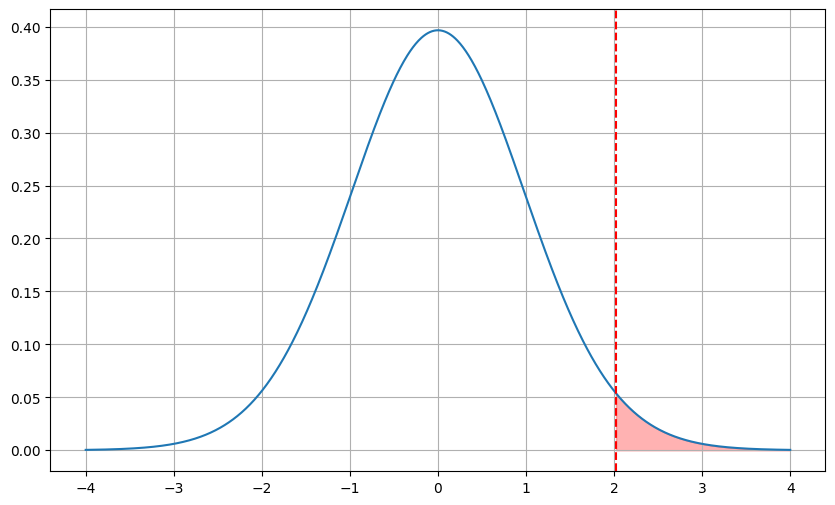

Estatística t calculada: 1.592

Resultado do teste: Não rejeitamos a hipótese nula, não há uma diferença significativa nas alturas médias entre estudantes


In [ ]:
x = np.linspace(-4, 4, 1000)  # Intervalo de valores para t
y = t_student.pdf(x, df=gl)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Distribuição t ({gl} graus de liberdade)')
plt.axvline(valor_critico, color='red', linestyle='--', label=f'Valor crítico de t: {valor_critico:.3f}')
plt.fill_between(x, 0, y, where=(x >= valor_critico), color='red', alpha=0.3)
plt.grid(True)
plt.show()

print(f'Estatística t calculada: {t:.3f}\n')
if abs(t) > valor_critico:
    print('Resultado do teste: Rejeitamos a hipótese nula, há uma diferença significativa nas alturas médias entre estudantes')
else:
    print('Resultado do teste: Não rejeitamos a hipótese nula, não há uma diferença significativa nas alturas médias entre estudantes')


## Teste T-Student Para Valores Emparelhados

Vamos considerar que a direção da UFPB quer calcular a taxa de evasão dos alunos dos cursos superiores após o 1º período.

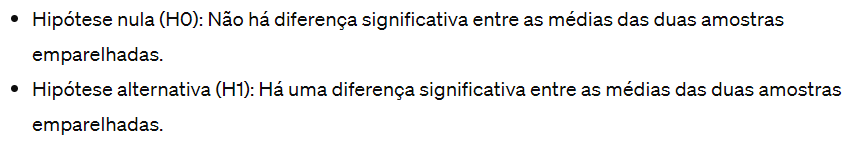

Alunos Curso1: 47
Alunos Curso2: 48
Alunos Curso3: 44
Alunos Curso4: 43
Alunos Curso5: 49
Alunos Curso6: 40
Alunos Curso7: 41
Alunos Curso8: 50
Alunos Curso9: 49
Alunos Curso10: 38
Alunos Curso11: 50
Alunos Curso12: 43
Alunos Curso13: 48
Alunos Curso14: 43
Alunos Curso15: 46


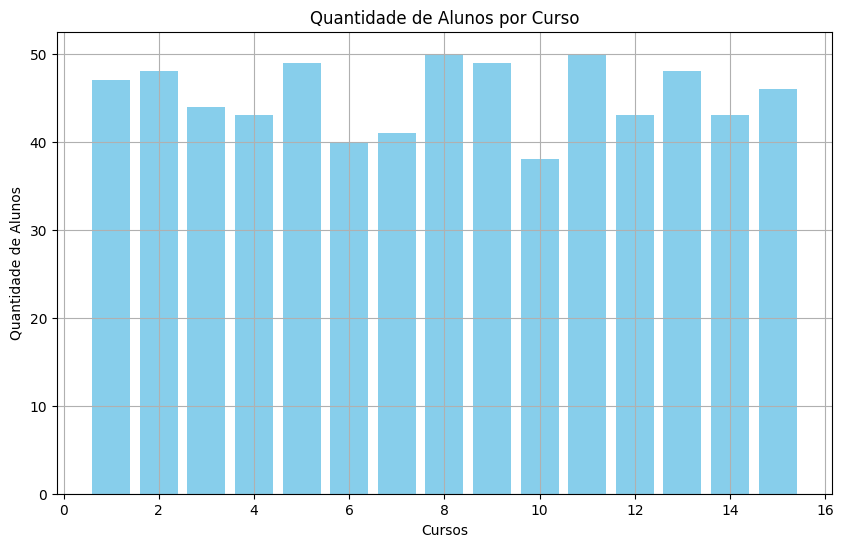

In [ ]:
# Criando amostras aleatórias
qnt_alunos1 = [random.randint(35,50) for i in range(15)]
for i in range(15):
  print(f'Alunos Curso{i+1}: {qnt_alunos1[i]}')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(range(1, 16), qnt_alunos1, color='skyblue')  # Cria as barras
plt.xlabel('Cursos')  # Legenda do eixo x
plt.ylabel('Quantidade de Alunos')  # Legenda do eixo y
plt.title('Quantidade de Alunos por Curso')  # Título do gráfico
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.show()  # Mostra o gráfico

## Amostras após o primeiro período de aulas

Alunos Curso1: 11
Alunos Curso2: 16
Alunos Curso3: 12
Alunos Curso4: 14
Alunos Curso5: 24
Alunos Curso6: 17
Alunos Curso7: 26
Alunos Curso8: 16
Alunos Curso9: 31
Alunos Curso10: 15
Alunos Curso11: 10
Alunos Curso12: 13
Alunos Curso13: 20
Alunos Curso14: 32
Alunos Curso15: 10


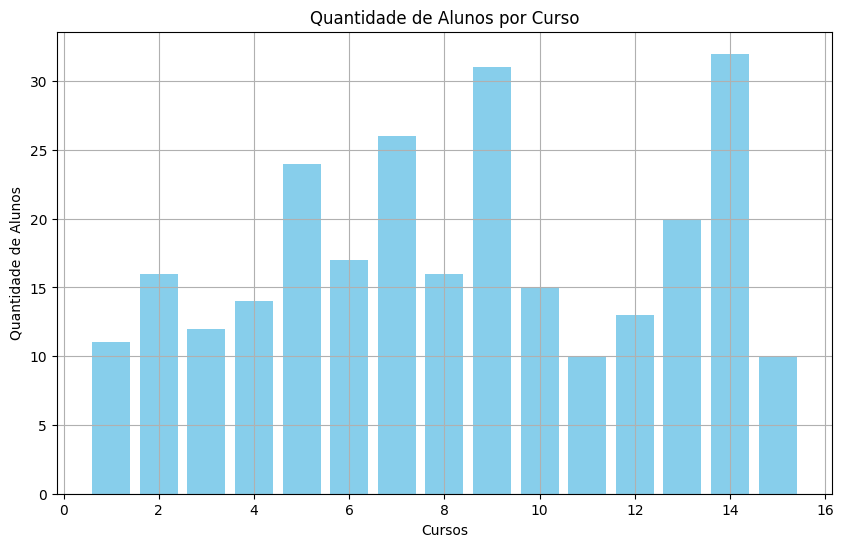

In [ ]:
# Criando amostras aleatórias
qnt_alunos2 = [random.randint(10,34) for i in range(15)]
for i in range(15):
  print(f'Alunos Curso{i+1}: {qnt_alunos2[i]}')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(range(1, 16), qnt_alunos2, color='skyblue')  # Cria as barras
plt.xlabel('Cursos')  # Legenda do eixo x
plt.ylabel('Quantidade de Alunos')  # Legenda do eixo y
plt.title('Quantidade de Alunos por Curso')  # Título do gráfico
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.show()  # Mostra o gráfico

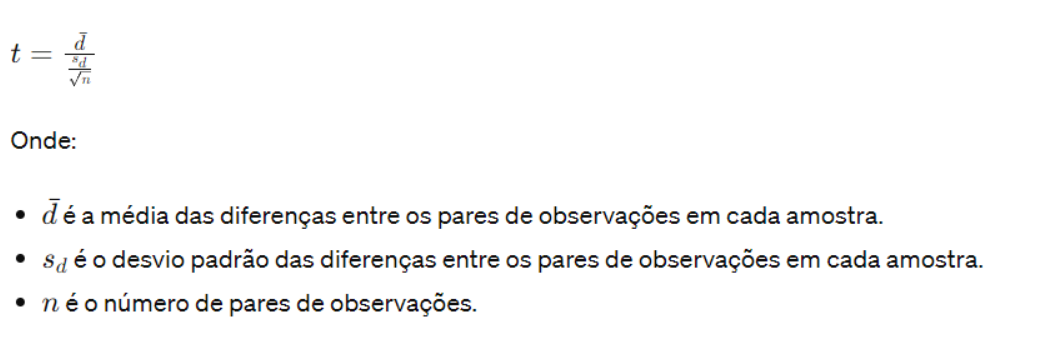

In [ ]:
import numpy as np
from scipy import stats

diferencas = []

# Calculando as diferenças entre as amostras emparelhadas
for i in range(len(qnt_alunos1)):
    diferenca = qnt_alunos1[i] - qnt_alunos2[i]
    diferencas.append(diferenca)

# Número de pares emparelhados
n = len(qnt_alunos1)

# Média das diferenças
media_diferencas = np.mean(diferencas)

# Desvio padrão das diferenças
desvio_padrao_diferencas = np.std(diferencas, ddof=1)

# Calculando a estatística t
t_statistic, p_valor = stats.ttest_rel(qnt_alunos1, qnt_alunos2)



## Plotagem dos Resultados

Estatística t: 12.861549775204974
Valor p: 3.822141588911004e-09
Rejeitamos H0. Há uma diferença significativa entre as médias de alunos.


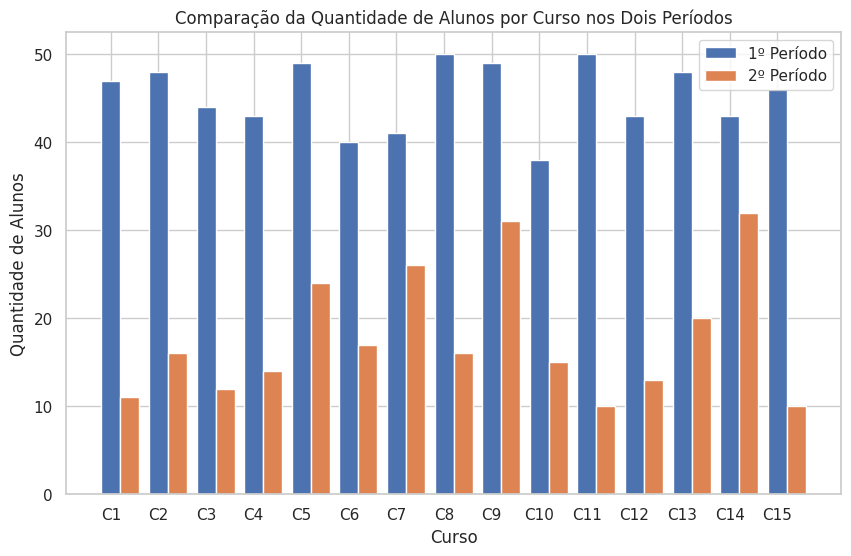

In [ ]:
import seaborn as sns
print("Estatística t:", t_statistic)
print("Valor p:", p_valor)

if p_valor < 0.05:
    print("Rejeitamos H0. Há uma diferença significativa entre as médias de alunos.")
else:
    print("Não rejeitamos H0. Não há uma diferença significativa entre as médias de alunos.\n")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(qnt_alunos1)), qnt_alunos1, width=0.4, label='1º Período')
plt.bar(np.arange(len(qnt_alunos2)) + 0.4, qnt_alunos2, width=0.4, label='2º Período')
plt.xlabel('Curso')
plt.ylabel('Quantidade de Alunos')
plt.title('Comparação da Quantidade de Alunos por Curso nos Dois Períodos')
plt.legend()
plt.xticks(np.arange(len(qnt_alunos1)), [f'C{i+1}' for i in range(len(qnt_alunos1))])
plt.show()
